In [6]:
# Loading the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.applications import ResNet50
from keras.models import Model
from keras.layers import GlobalAveragePooling2D

In [7]:
import tensorflow as tf
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available: 0


In [ ]:
# Loading the dataset and preparing it for training
train_path = '../dataset_organized/train/'
test_path = '../dataset_organized/test/'
val_path = '../dataset_organized/validation/'

# Loading the dataset
import os
import cv2
from tqdm import tqdm

def load_images(path):

    X = []
    y = []

    for folder in os.listdir(path):
        files = os.listdir(path + folder)
        for file in tqdm(files):
            img = cv2.imread(path + folder + '/' + file)
            img = cv2.resize(img, (150, 150))
            X.append(img)
            y.append(folder)
    
    X = np.array(X)
    y = np.array(y)

    return X, y

X_train, y_train = load_images(train_path)
X_test, y_test = load_images(test_path)
X_val, y_val = load_images(val_path)
1
classes_names = np.unique(y_train)

# Encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
y_val_encoded = label_encoder.transform(y_val)

# One hot encoding the target variable
y_train = to_categorical(y_train_encoded)
y_test = to_categorical(y_test_encoded)
y_val = to_categorical(y_val_encoded)

# Splitting the training set into training and validation set
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_encoded, test_size=0.2, random_state=0)

# Normalizing the images
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

100%|██████████| 17/17 [00:00<00:00, 1799.49it/s]


# Base Resnet

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 150, 150,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_pad           │ (None, 156, 156,  │          0 │ input_layer_2[0]… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_conv (Conv2D) │ (None, 75, 75,    │      9,472 │ conv1_pad[0][0]   │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_bn            │ (None, 75, 75,    │        256 │ conv1_conv[0][0]  │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1_relu          │ (None, 75, 75,    │          0 │ conv1_bn[0][0]    │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pad           │ (None, 77, 77,    │          0 │ conv1_relu[0][0]  │
│ (ZeroPadding2D)     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ pool1_pool          │ (None, 38, 38,    │          0 │ pool1_pad[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_conv │ (None, 38, 38,    │      4,160 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_bn   │ (None, 38, 38,    │        256 │ conv2_block1_1_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_1_relu │ (None, 38, 38,    │          0 │ conv2_block1_1_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_conv │ (None, 38, 38,    │     36,928 │ conv2_block1_1_r… │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_bn   │ (None, 38, 38,    │        256 │ conv2_block1_2_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_2_relu │ (None, 38, 38,    │          0 │ conv2_block1_2_b… │
│ (Activation)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_conv │ (None, 38, 38,    │     16,640 │ pool1_pool[0][0]  │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_conv │ (None, 38, 38,    │     16,640 │ conv2_block1_2_r… │
│ (Conv2D)            │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_0_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_0_c… │
│ (BatchNormalizatio… │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2_block1_3_bn   │ (None, 38, 38,    │      1,024 │ conv2_block1_3_c

 Total params: 23,850,758 (90.98 MB)

 Trainable params: 263,046 (1.00 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

Epoch 1/10


2025-04-01 10:49:17.191869: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 477360000 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 43s 706ms/step - accuracy: 0.1927 - loss: 1.8630 - val_accuracy: 0.2744 - val_loss: 1.7059
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 600ms/step - accuracy: 0.2426 - loss: 1.7245 - val_accuracy: 0.2896 - val_loss: 1.6754
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 586ms/step - accuracy: 0.2382 - loss: 1.6946 - val_accuracy: 0.3049 - val_loss: 1.6746
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 576ms/step - accuracy: 0.2713 - loss: 1.6775 - val_accuracy: 0.2927 - val_loss: 1.6401
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 566ms/step - accuracy: 0.2960 - loss: 1.6532 - val_accuracy: 0.3079 - val_loss: 1.6338
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 583ms/step - accuracy: 0.2922 - loss: 1.6428 - val_accuracy: 0.3293 - val_loss: 1.6364
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 573ms/step - accuracy: 0.2799 - loss: 1.6411 - val_accuracy: 0.2744 - val_loss: 1.6337
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 564ms/step - accuracy: 0.2862 - loss: 1.6592 - val_accuracy: 0.289

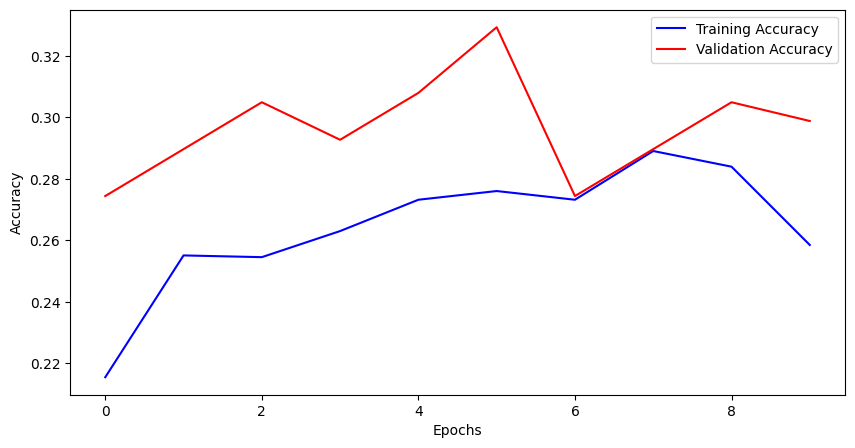

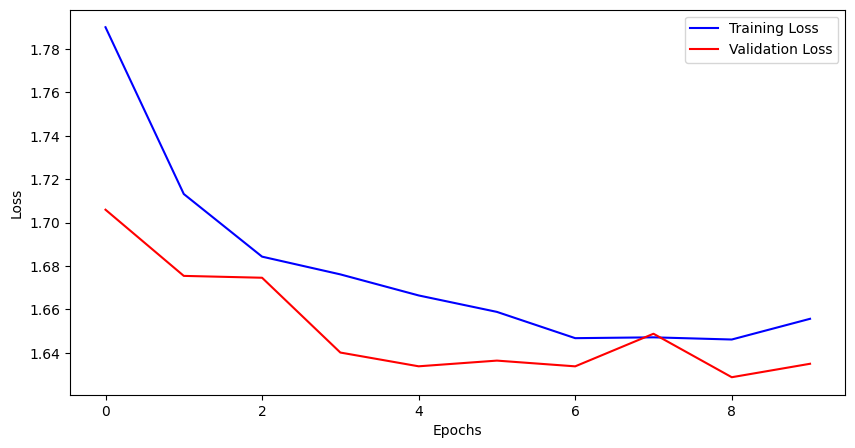

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# saving the model
model.save('resnet_model.h5')
plt.figure(figsize=(15, 5))

# Plotting the training and validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


# Plotting the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])

print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])

# Building the ResNet model with L2 Regularization


Epoch 1/10


2025-04-01 11:04:12.656263: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 477360000 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 638ms/step - accuracy: 0.2441 - loss: 1.8796 - val_accuracy: 0.2988 - val_loss: 1.7041
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 574ms/step - accuracy: 0.2498 - loss: 1.7110 - val_accuracy: 0.2774 - val_loss: 1.6599
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 577ms/step - accuracy: 0.2589 - loss: 1.6958 - val_accuracy: 0.2774 - val_loss: 1.6552
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 578ms/step - accuracy: 0.3022 - loss: 1.6686 - val_accuracy: 0.2561 - val_loss: 1.6414
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 579ms/step - accuracy: 0.2834 - loss: 1.6383 - val_accuracy: 0.2774 - val_loss: 1.6750
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 583ms/step - accuracy: 0.2970 - loss: 1.6579 - val_accuracy: 0.2835 - val_loss: 1.6365
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 577ms/step - accuracy: 0.3132 - loss: 1.6230 - val_accuracy: 0.2835 - val_loss: 1.6305
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 583ms/step - accuracy: 0.3092 - loss: 1.6301 - val_accuracy: 0.277

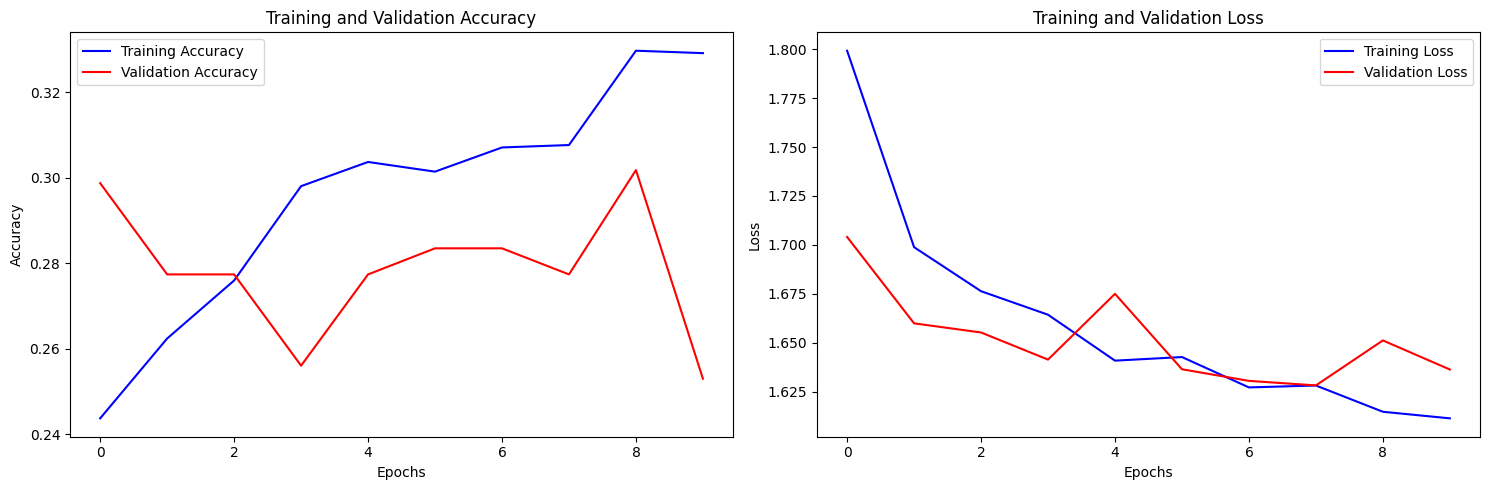

Training Accuracy: 0.32918551564216614
Validation Accuracy: 0.25304877758026123
Training Loss: 1.6113743782043457
Validation Loss: 1.63632333278656


In [11]:
from keras.regularizers import l2

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l2(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('resnet_model_l2.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the ResNet model with L1 Regularization


Epoch 1/10


2025-04-01 11:09:53.295005: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 477360000 exceeds 10% of free system memory.


56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 648ms/step - accuracy: 0.2268 - loss: 6.0585 - val_accuracy: 0.2896 - val_loss: 2.1380
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 603ms/step - accuracy: 0.2551 - loss: 2.0104 - val_accuracy: 0.2530 - val_loss: 1.8515
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 35s 623ms/step - accuracy: 0.2476 - loss: 1.8591 - val_accuracy: 0.2530 - val_loss: 1.8073
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 582ms/step - accuracy: 0.2595 - loss: 1.8323 - val_accuracy: 0.2835 - val_loss: 1.7954
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 570ms/step - accuracy: 0.2759 - loss: 1.7949 - val_accuracy: 0.2500 - val_loss: 1.7861
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.2456 - loss: 1.7974 - val_accuracy: 0.2500 - val_loss: 1.8291
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 575ms/step - accuracy: 0.2853 - loss: 1.7742 - val_accuracy: 0.3079 - val_loss: 1.7862
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 581ms/step - accuracy: 0.2554 - loss: 1.7702 - val_accuracy: 0.295

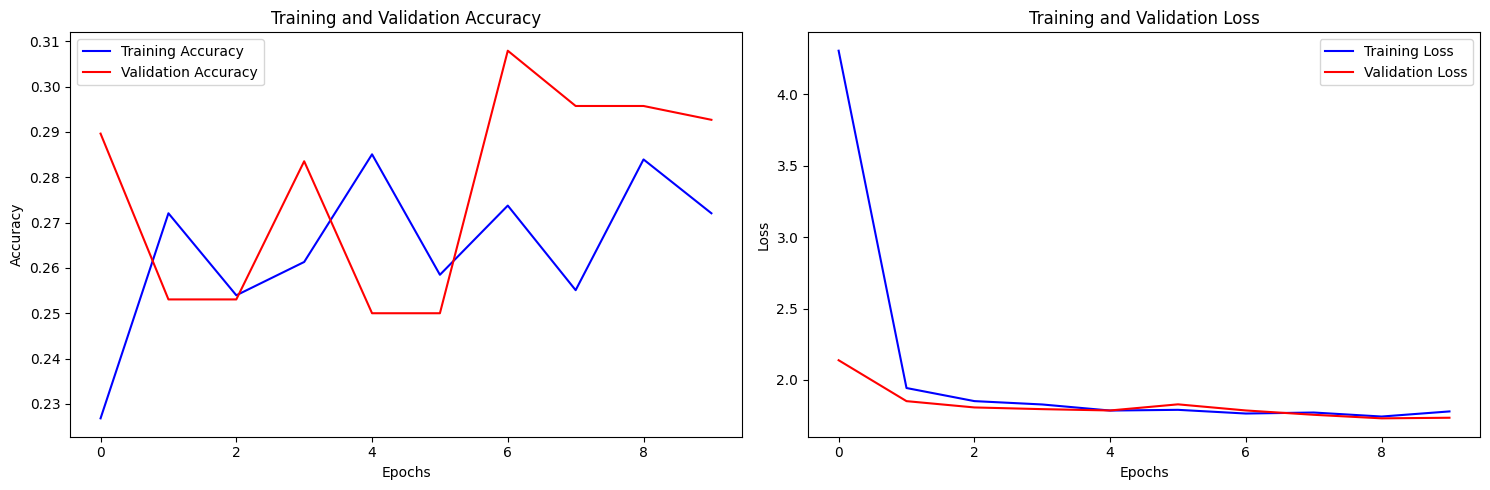

Training Accuracy: 0.2720588147640228
Validation Accuracy: 0.2926829159259796
Training Loss: 1.7794357538223267
Validation Loss: 1.7351950407028198


In [12]:

from keras.regularizers import l1

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_regularizer=l1(0.001))(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('resnet_model_l1.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the ResNet model with Dropout Regularization


Epoch 1/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 41s 646ms/step - accuracy: 0.2136 - loss: 1.8459 - val_accuracy: 0.2896 - val_loss: 1.6841
Epoch 2/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 606ms/step - accuracy: 0.2398 - loss: 1.7237 - val_accuracy: 0.2530 - val_loss: 1.6688
Epoch 3/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 582ms/step - accuracy: 0.2799 - loss: 1.7053 - val_accuracy: 0.2805 - val_loss: 1.6607
Epoch 4/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 571ms/step - accuracy: 0.2449 - loss: 1.6926 - val_accuracy: 0.2866 - val_loss: 1.6656
Epoch 5/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 592ms/step - accuracy: 0.2799 - loss: 1.6604 - val_accuracy: 0.2683 - val_loss: 1.6417
Epoch 6/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 692ms/step - accuracy: 0.2691 - loss: 1.6591 - val_accuracy: 0.2256 - val_loss: 1.6331
Epoch 7/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 34s 603ms/step - accuracy: 0.2802 - loss: 1.6444 - val_accuracy: 0.3110 - val_loss: 1.6282
Epoch 8/10
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 563ms/step - accuracy: 0.2871 - loss: 1.6403 - val_accu

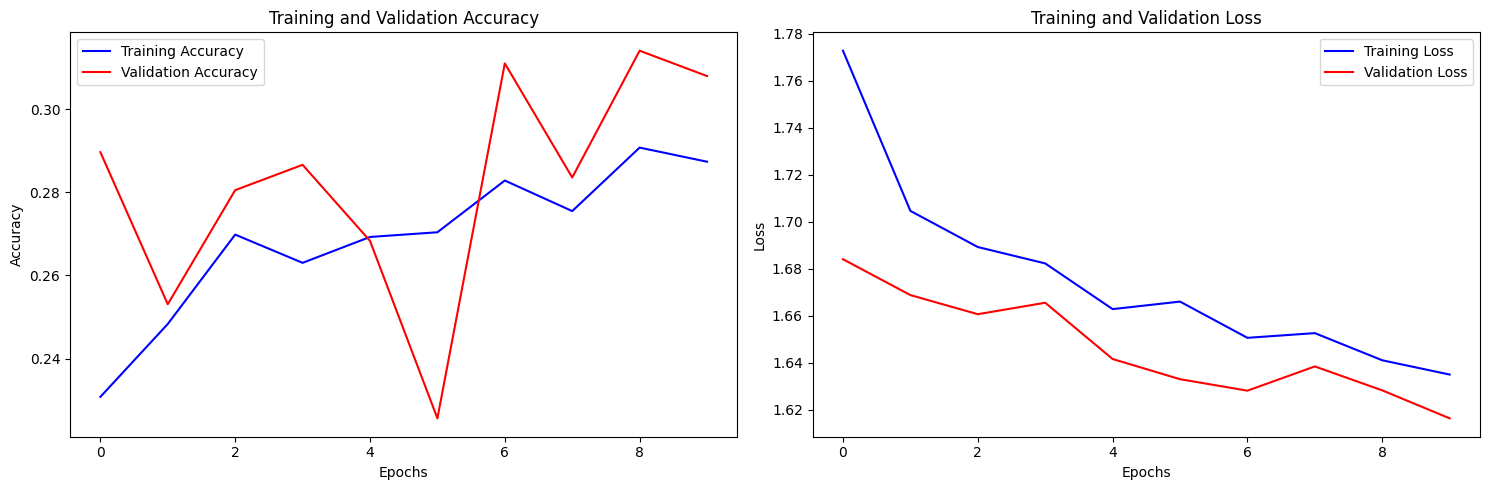

Training Accuracy: 0.2873303294181824
Validation Accuracy: 0.30792683362960815
Training Loss: 1.635036587715149
Validation Loss: 1.6164132356643677


In [13]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Saving the model
model.save('resnet_model_dropout.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the ResNet model with EarlyStopping


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 40s 633ms/step - accuracy: 0.2265 - loss: 1.7285 - val_accuracy: 0.2744 - val_loss: 1.6630
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 33s 590ms/step - accuracy: 0.2575 - loss: 1.6841 - val_accuracy: 0.2805 - val_loss: 1.6719
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 562ms/step - accuracy: 0.2950 - loss: 1.6562 - val_accuracy: 0.3079 - val_loss: 1.6334
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 555ms/step - accuracy: 0.3134 - loss: 1.6083 - val_accuracy: 0.2957 - val_loss: 1.6452
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.3038 - loss: 1.6021 - val_accuracy: 0.2866 - val_loss: 1.6109
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 30s 545ms/step - accuracy: 0.3025 - loss: 1.6169 - val_accuracy: 0.2927 - val_loss: 1.6094
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 545ms/step - accuracy: 0.2972 - loss: 1.6080 - val_accuracy: 0.3201 - val_loss: 1.6117
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 548ms/step - accuracy: 0.3623 - loss: 1.5777 - val_accu

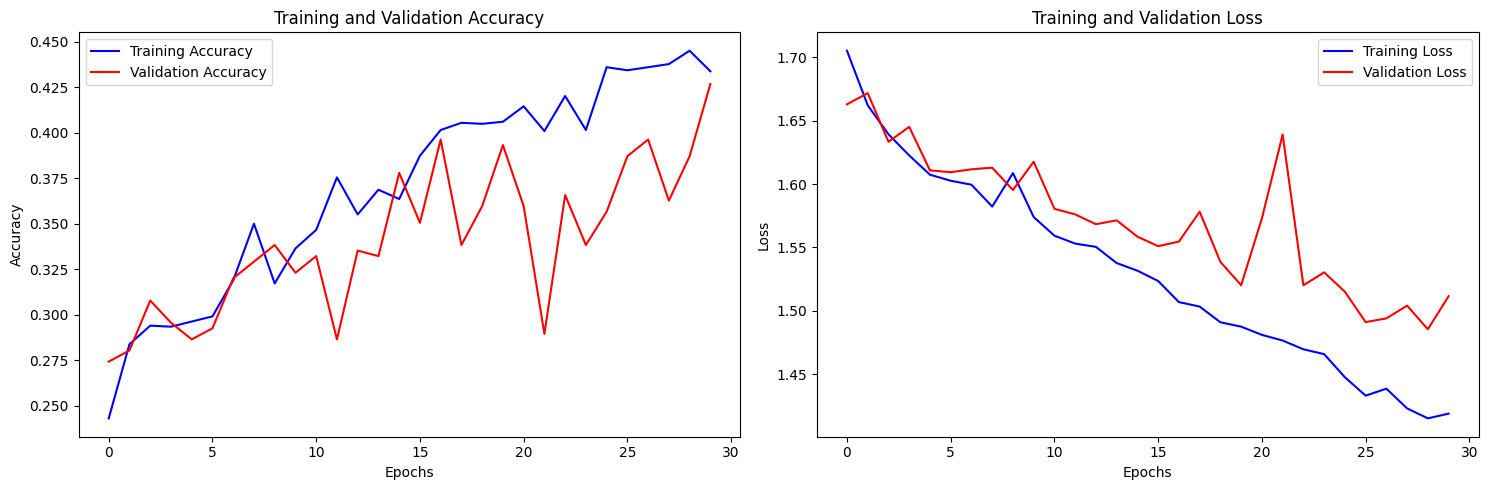

Training Accuracy: 0.43382352590560913
Validation Accuracy: 0.4268292784690857
Training Loss: 1.4188475608825684
Validation Loss: 1.5115658044815063


In [14]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Saving the model
model.save('resnet_model_es.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


# Building the ResNet model with Dropout + EarlyStopping


Epoch 1/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 39s 616ms/step - accuracy: 0.1947 - loss: 1.8216 - val_accuracy: 0.2530 - val_loss: 1.6862
Epoch 2/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 563ms/step - accuracy: 0.2274 - loss: 1.7071 - val_accuracy: 0.2622 - val_loss: 1.6765
Epoch 3/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 550ms/step - accuracy: 0.2495 - loss: 1.6986 - val_accuracy: 0.3232 - val_loss: 1.6584
Epoch 4/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 570ms/step - accuracy: 0.2796 - loss: 1.6596 - val_accuracy: 0.3232 - val_loss: 1.6405
Epoch 5/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 31s 558ms/step - accuracy: 0.2662 - loss: 1.6683 - val_accuracy: 0.2805 - val_loss: 1.6295
Epoch 6/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 572ms/step - accuracy: 0.2676 - loss: 1.6554 - val_accuracy: 0.2805 - val_loss: 1.6305
Epoch 7/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 567ms/step - accuracy: 0.2743 - loss: 1.6648 - val_accuracy: 0.2744 - val_loss: 1.6323
Epoch 8/30
56/56 ━━━━━━━━━━━━━━━━━━━━ 32s 566ms/step - accuracy: 0.2703 - loss: 1.6386 - val_accu

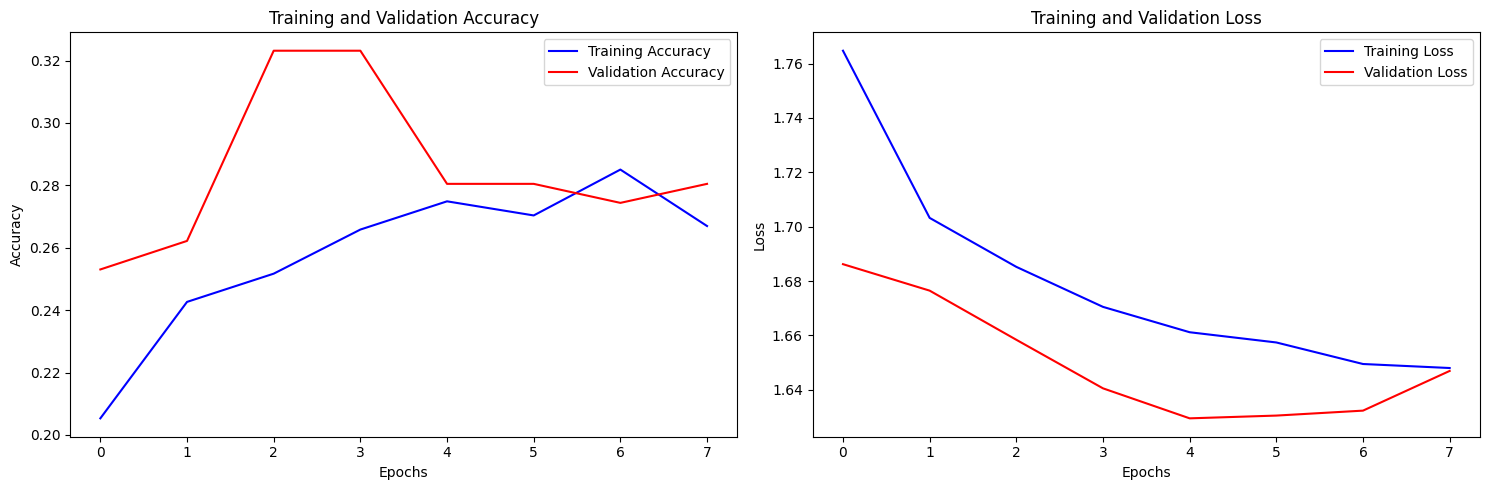

Training Accuracy: 0.26696833968162537
Validation Accuracy: 0.2804878056049347
Training Loss: 1.6480119228363037
Validation Loss: 1.6469417810440063


In [15]:

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(150, 150, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(6, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])

# Saving the model
model.save('resnet_model_de.h5')

# Plotting the training and validation accuracy and loss side by side
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

print('Training Accuracy:', history.history['accuracy'][-1])
print('Validation Accuracy:', history.history['val_accuracy'][-1])
print('Training Loss:', history.history['loss'][-1])
print('Validation Loss:', history.history['val_loss'][-1])


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    f1_score, precision_score, recall_score,
    accuracy_score, roc_curve, auc,
    classification_report, confusion_matrix
)

def evaluate_model(predictions, y_true, class_names):
    # F1 Score
    f1 = f1_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("F1 Score: ", f1)

    # Precision
    precision = precision_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Precision: ", precision)

    # Recall
    recall = recall_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), average='weighted')
    print("Recall: ", recall)

    # Accuracy
    accuracy = accuracy_score(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))
    print("Accuracy: ", accuracy)

    # Compute ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(len(class_names)):
        fpr[i], tpr[i], _ = roc_curve(y_true[:, i], predictions[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Confusion Matrix
    cm = confusion_matrix(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1))

    # Plot ROC + Confusion Matrix in one figure
    fig, axes = plt.subplots(1, 2, figsize=(18, 7))

    # ROC Curve Plot
    for i in range(len(class_names)):
        axes[0].plot(fpr[i], tpr[i], label=class_names[i] + f' (AUC = {roc_auc[i]:.2f})')
    axes[0].plot([0, 1], [0, 1], 'k--')
    axes[0].set_title('ROC Curve')
    axes[0].set_xlabel('False Positive Rate')
    axes[0].set_ylabel('True Positive Rate')
    axes[0].legend()

    # Confusion Matrix Plot
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names, ax=axes[1])
    axes[1].set_title('Confusion Matrix')
    axes[1].set_xlabel('Predicted')
    axes[1].set_ylabel('Actual')

    plt.tight_layout()
    plt.show()

    # Classification Report
    print(classification_report(np.argmax(y_true, axis=1), np.argmax(predictions, axis=1), target_names=class_names))



Loading the model



Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 558ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 470ms/step - accuracy: 0.3924 - loss: 1.5077
Test Loss: 1.6500422954559326
Test Accuracy: 0.31786543130874634
F1 Score:  0.23141208103155747
Precision:  0.2960128136170483
Recall:  0.31786542923433875
Accuracy:  0.31786542923433875


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


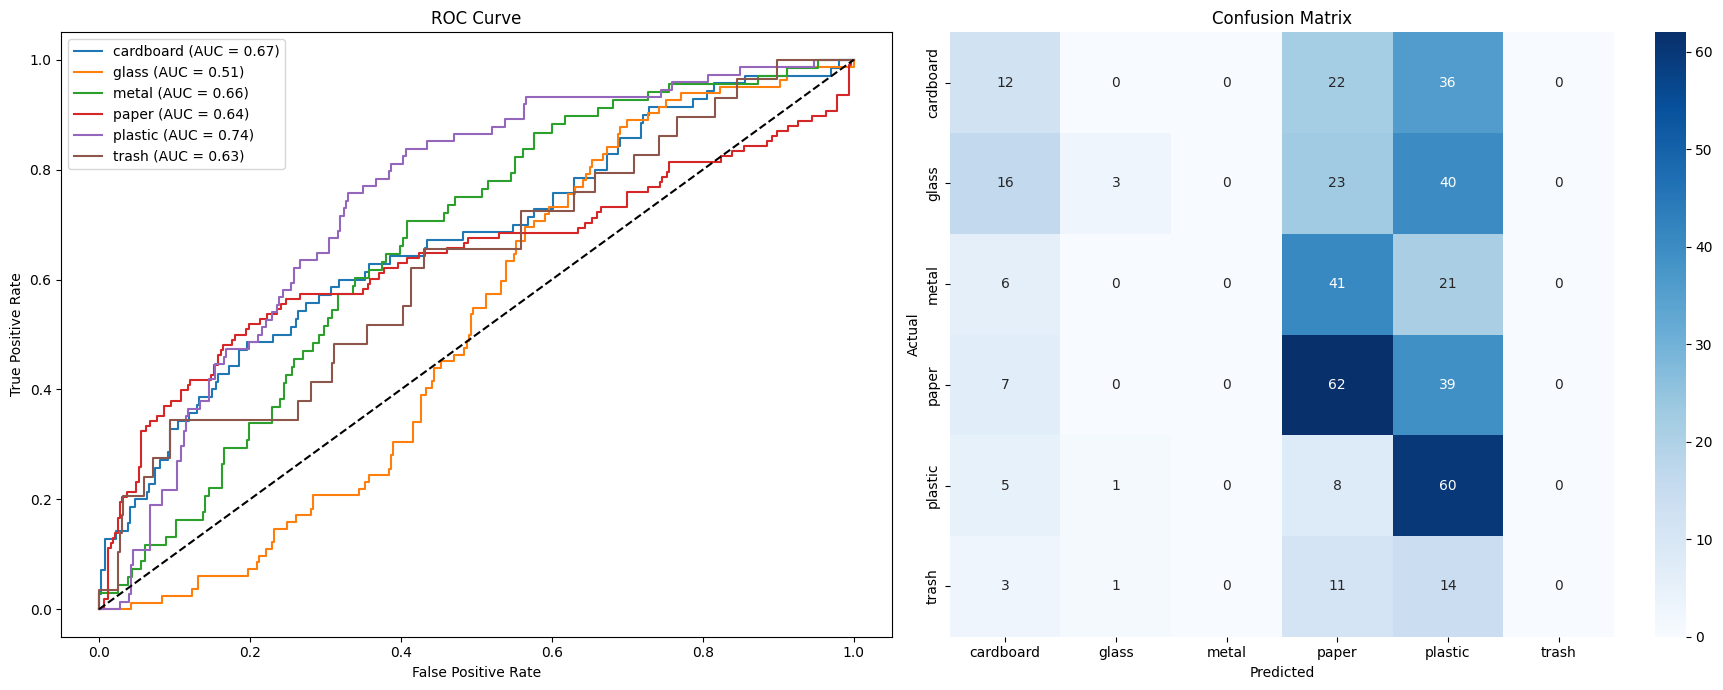

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.24      0.17      0.20        70
       glass       0.60      0.04      0.07        82
       metal       0.00      0.00      0.00        68
       paper       0.37      0.57      0.45       108
     plastic       0.29      0.81      0.42        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.32       431
   macro avg       0.25      0.27      0.19       431
weighted avg       0.30      0.32      0.23       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 555ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step - accuracy: 0.4121 - loss: 1.4832
Test Loss: 1.6341344118118286
Test Accuracy: 0.29466357827186584
F1 Score:  0.21133991816933226
Precision:  0.3201868441916493
Recall:  0.29466357308584684
Accuracy:  0.29466357308584684


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


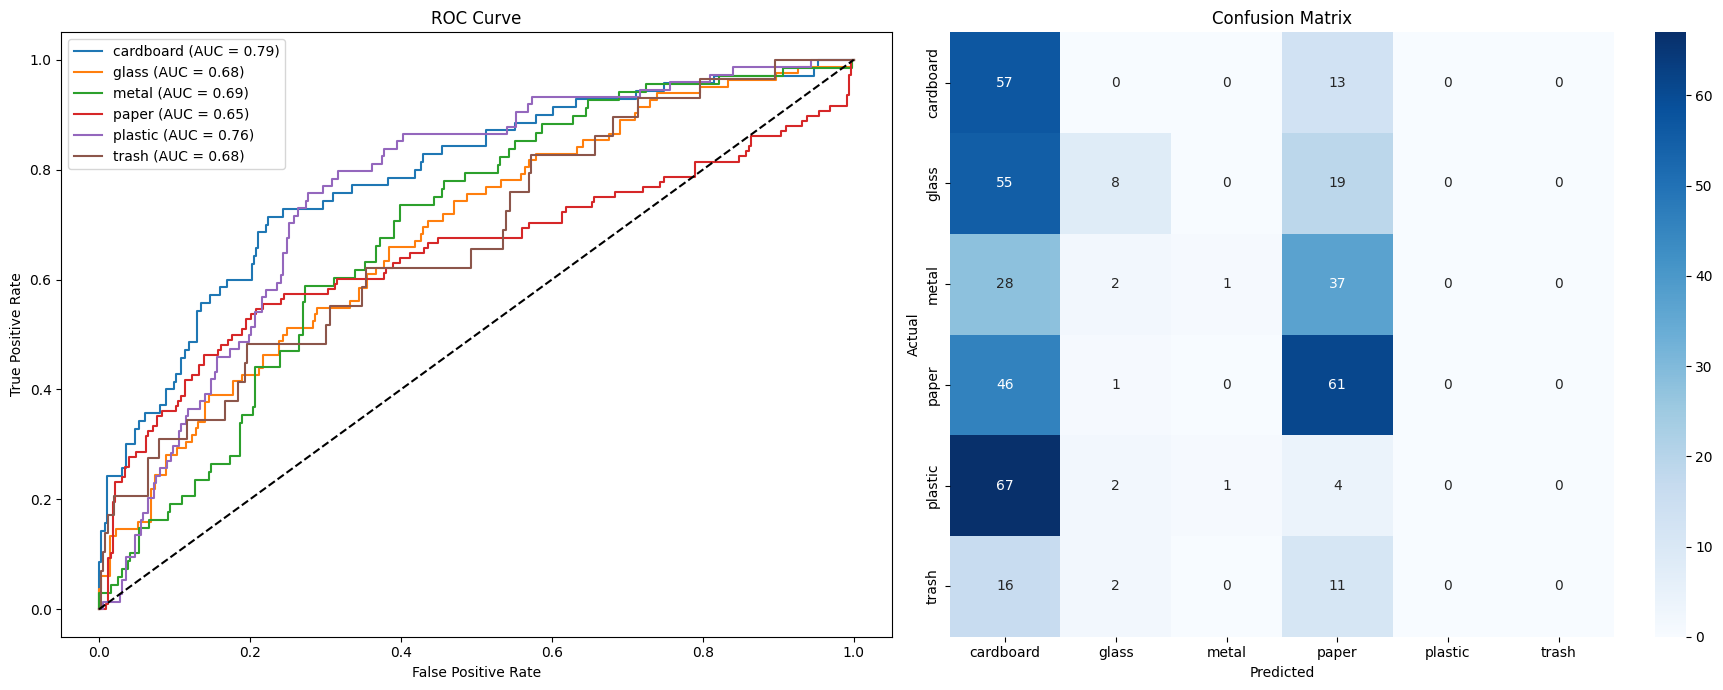

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.21      0.81      0.34        70
       glass       0.53      0.10      0.16        82
       metal       0.50      0.01      0.03        68
       paper       0.42      0.56      0.48       108
     plastic       0.00      0.00      0.00        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.29       431
   macro avg       0.28      0.25      0.17       431
weighted avg       0.32      0.29      0.21       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 579ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 471ms/step - accuracy: 0.3450 - loss: 1.6765
Test Loss: 1.7658452987670898
Test Accuracy: 0.29002320766448975
F1 Score:  0.18245220120958572
Precision:  0.15021109885512152
Recall:  0.2900232018561485
Accuracy:  0.2900232018561485


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


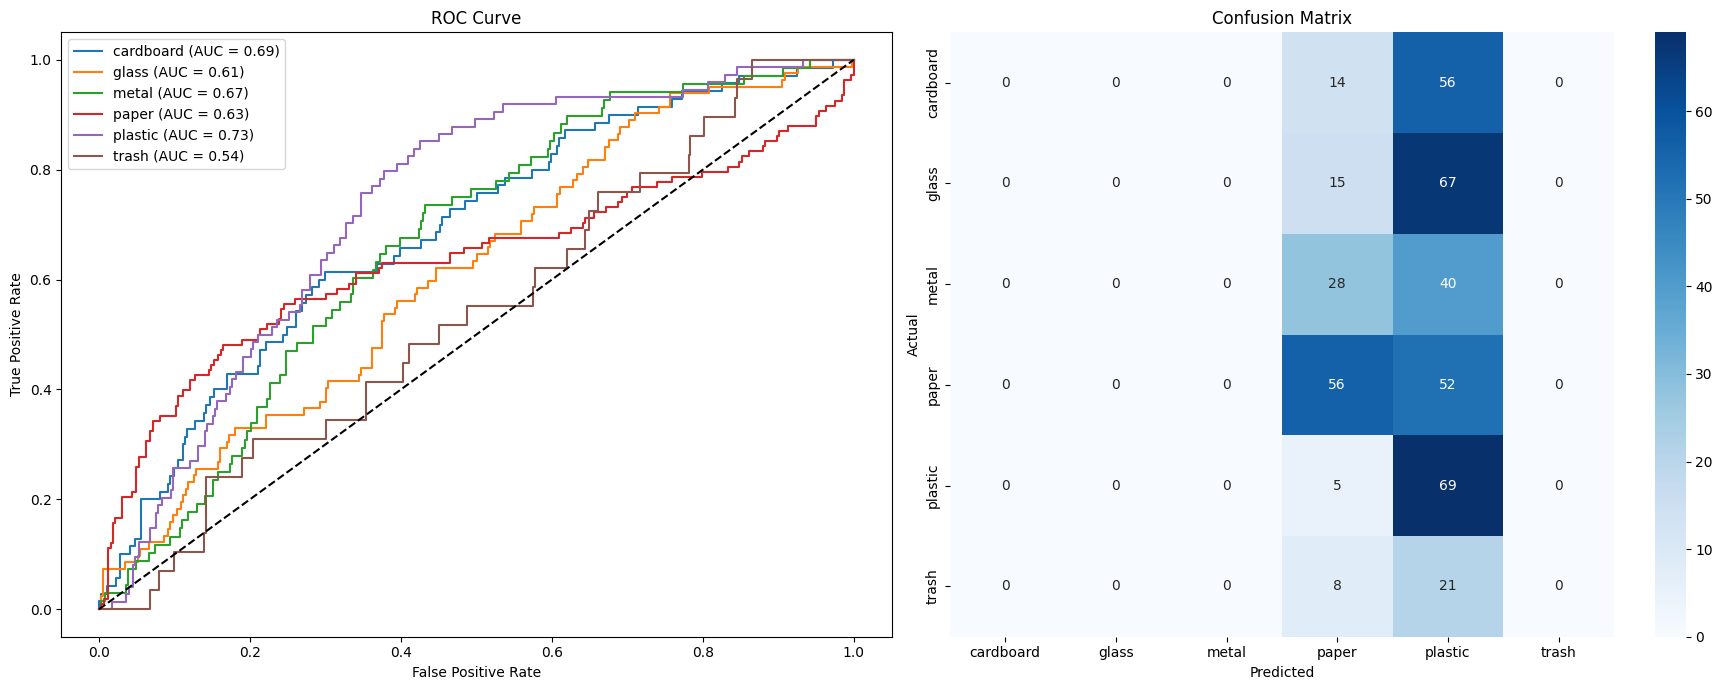

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00        70
       glass       0.00      0.00      0.00        82
       metal       0.00      0.00      0.00        68
       paper       0.44      0.52      0.48       108
     plastic       0.23      0.93      0.36        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.29       431
   macro avg       0.11      0.24      0.14       431
weighted avg       0.15      0.29      0.18       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 588ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 513ms/step - accuracy: 0.4575 - loss: 1.4422
Test Loss: 1.6457147598266602
Test Accuracy: 0.3294663429260254
F1 Score:  0.25021814185326213
Precision:  0.2017561945363391
Recall:  0.3294663573085847
Accuracy:  0.3294663573085847


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


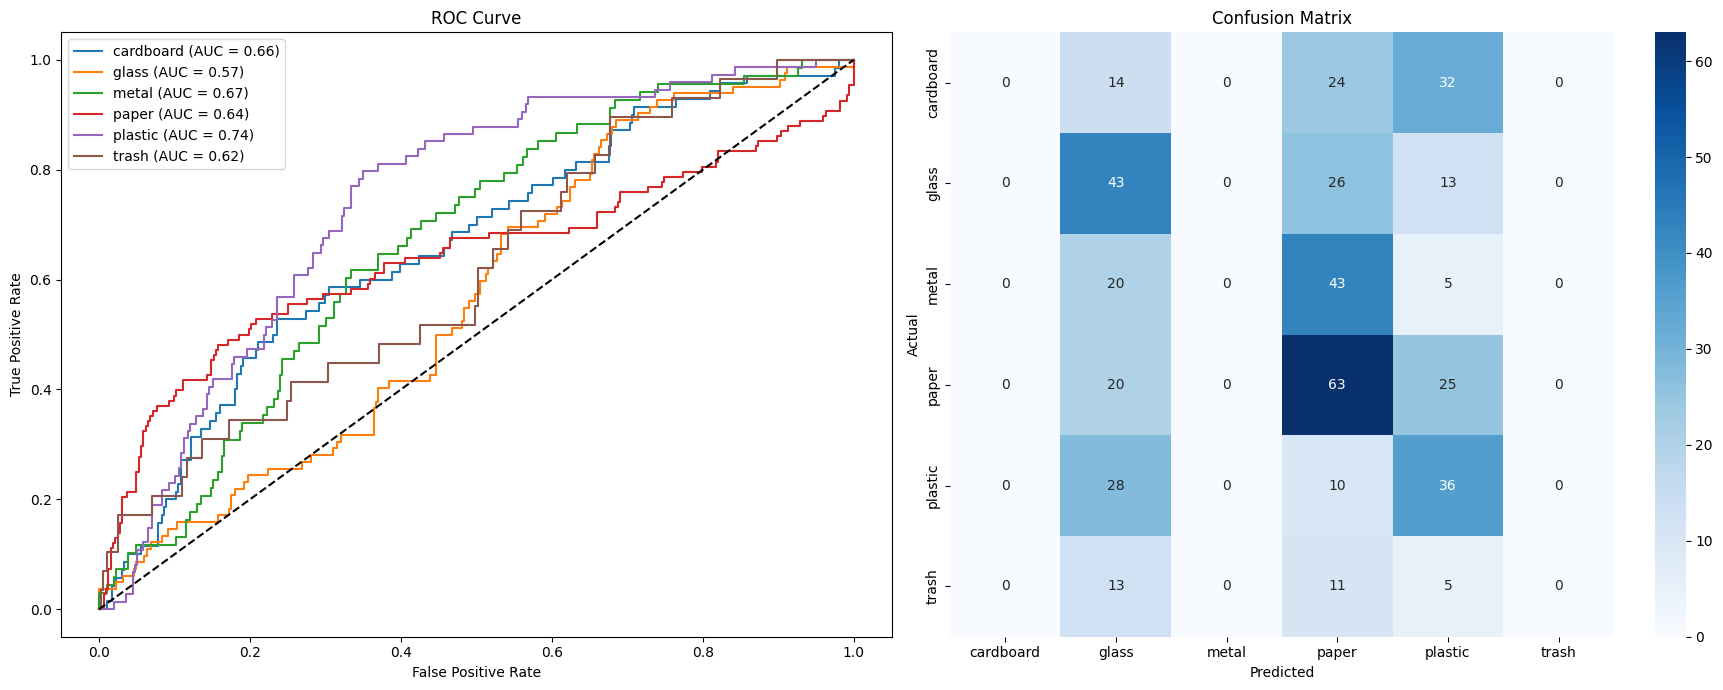

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00        70
       glass       0.31      0.52      0.39        82
       metal       0.00      0.00      0.00        68
       paper       0.36      0.58      0.44       108
     plastic       0.31      0.49      0.38        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.33       431
   macro avg       0.16      0.27      0.20       431
weighted avg       0.20      0.33      0.25       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 596ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 10s 493ms/step - accuracy: 0.4696 - loss: 1.2523
Test Loss: 1.4770091772079468
Test Accuracy: 0.40371230244636536
F1 Score:  0.3659010890594151
Precision:  0.4316003935142779
Recall:  0.4037122969837587
Accuracy:  0.4037122969837587


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


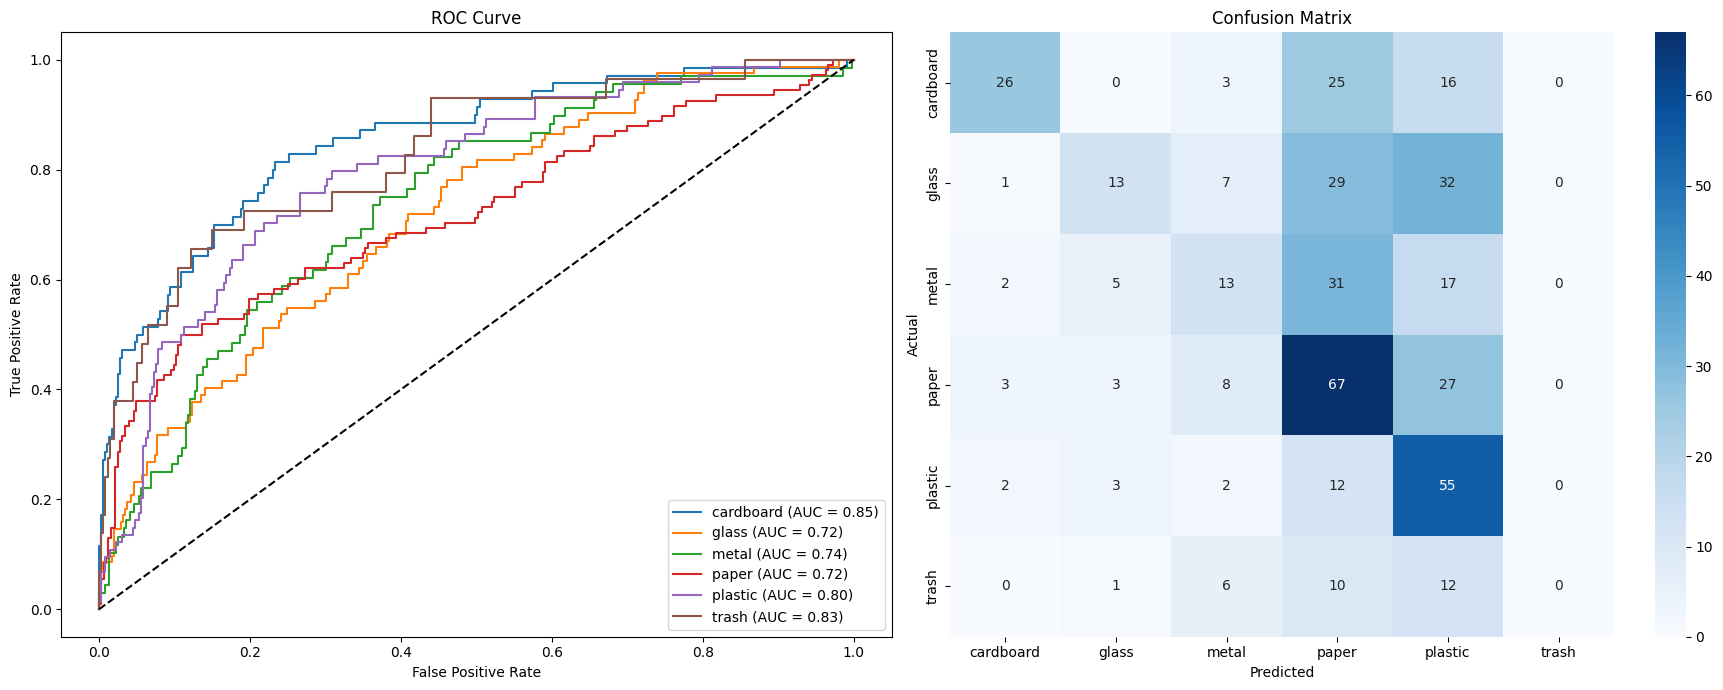

/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

              precision    recall  f1-score   support

   cardboard       0.76      0.37      0.50        70
       glass       0.52      0.16      0.24        82
       metal       0.33      0.19      0.24        68
       paper       0.39      0.62      0.48       108
     plastic       0.35      0.74      0.47        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.40       431
   macro avg       0.39      0.35      0.32       431
weighted avg       0.43      0.40      0.37       431


Evaluating the model
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 576ms/step
14/14 ━━━━━━━━━━━━━━━━━━━━ 9s 488ms/step - accuracy: 0.3751 - loss: 1.5119
Test Loss: 1.6567094326019287
Test Accuracy: 0.3016241192817688
F1 Score:  0.185544184488927
Precision:  0.19939355659168648
Recall:  0.30162412993039445
Accuracy:  0.30162412993039445


/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


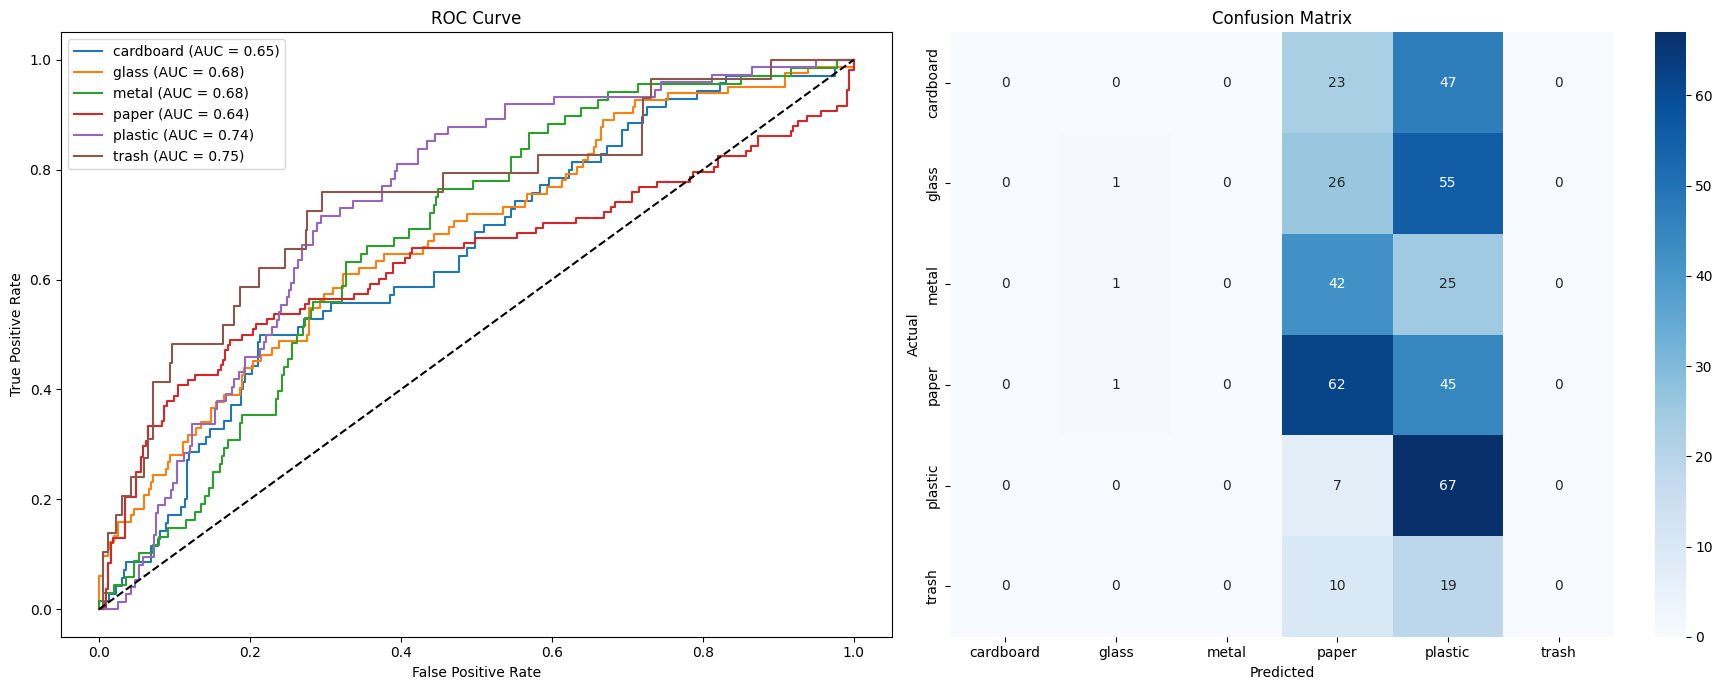

              precision    recall  f1-score   support

   cardboard       0.00      0.00      0.00        70
       glass       0.33      0.01      0.02        82
       metal       0.00      0.00      0.00        68
       paper       0.36      0.57      0.45       108
     plastic       0.26      0.91      0.40        74
       trash       0.00      0.00      0.00        29

    accuracy                           0.30       431
   macro avg       0.16      0.25      0.15       431
weighted avg       0.20      0.30      0.19       431



/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/alexandre/Documents/Projeto-CAA-1/venv/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [17]:
from keras.models import load_model

print("\nLoading the model")
model = load_model('resnet_model.h5')
model_l2 = load_model('resnet_model_l2.h5')
model_l1 = load_model('resnet_model_l1.h5')
model_dropout = load_model('resnet_model_dropout.h5')
model_es = load_model('resnet_model_es.h5')
model_de = load_model('resnet_model_de.h5')

for m in [model, model_l2, model_l1, model_dropout, model_es, model_de]:
    print("\nEvaluating the model")
    predictions = m.predict(X_test)
    loss, accuracy = m.evaluate(X_test, y_test)
    print('Test Loss:', loss)
    print('Test Accuracy:', accuracy)
    evaluate_model(predictions, y_test, classes_names)

In [ ]:
# Function to displaying random predictions from the dataset with their images and predictions

def display_random_predictions(X, y, predictions, classes_names, number_of_predictions=5):
    plt.figure(figsize=(15, 20))

    for class_name in classes_names:
        for i in range(number_of_predictions):
            index = np.random.choice(np.where(y == class_name)[0])
            plt.subplot(len(classes_names), number_of_predictions, number_of_predictions * list(classes_names).index(class_name) + i + 1)
            plt.imshow(X[index])
            plt.title("Actual: " + class_name + "\nPredicted: " + label_encoder.classes_[np.argmax(predictions[index])])
            plt.axis('off')
    
    plt.show()

display_random_predictions(X_test, y_test, predictions, classes_names)